## TL;DR
When you calculate something from a dataset, the result you get is subject to measurement and sampling error that occured during dataset collection. If you tried to re-collect the data you'd get a different dataset and thus a different calculated value. The distribution of calculated values you _might have seen_ is called a Sampling Distribution. 

We want the sampling distribution to be narrow and near to the the true value, so that our particular calculated value is likely pretty close to the true value. This often happens when we have a lot of data, but not always.

## Sampling Distributions
In the last notebook (Myth of "The" Data) we established that anything we calculate from a dataset is but one of many possible values we'd see if we re-tried the entire data-collection-and-calculation process. In this notebook we're going to get a feel for the range of possible values we might see as we calculate the mean of a dataset, the variance of a dataset, and the range of the dataset.

Our primary metaphor will be that there is an army of grad students who all have the same experimental plan: randomly sample individuals in the US and measure their heights, then find the average height, the spread of the heights, and the maximum height.

Further, we will right now select grand student 0 to be us, and see how where "our" observations in the range of possible observations. The key thing to keep in mind is that this is always the world we live in: we see one calculate one particular mean, but that value is just one draw from a whole set means we might have seen with slightly different luck in the data collection.

## The Population
We're going to go ahead and build a population of 300 million individuals (here representing the entire US population)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)
us_population_size = 300000000
female_pop = int(np.floor(us_population_size*.508))

us_pop_heights = np.zeros(us_population_size)
us_pop_heights[0:female_pop] = np.random.normal(163,5,female_pop)
us_pop_heights[female_pop:us_population_size] = np.random.normal(180,7,us_population_size-female_pop)

true_pop_mean=np.mean(us_pop_heights)
true_pop_variance=np.var(us_pop_heights)
true_pop_max=np.max(us_pop_heights)

If we plot the whole population we can see that the distribution is slightly weird and lumpy. This is on purpose and will be important later. The true population mean is drawn in in red.

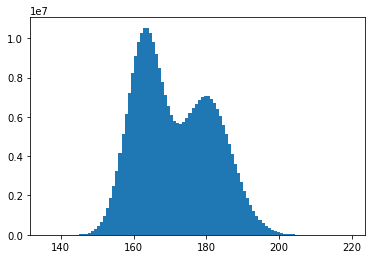

In [2]:
plt.hist(us_pop_heights,100)
plt.show()

Now that we have the population, we set each grad student to work. Each grad student's job is to sample 1,000 members of the population to form their own personal dataset. Then each grad student uses their own dataset to find the mean height, the variance in heights, and the maximum height.

In [3]:
def sample_and_calculate(n_grad_students,n_samples_per_student):
    #allocate space for the results. Each grad student will collect
    #a random sample from the population and using those heights record the
    #statistics below
    each_students_mean = np.zeros(n_grad_students)
    each_students_variance = np.zeros(n_grad_students)
    each_students_max = np.zeros(n_grad_students)
    for i in range(n_grad_students):
        #get this student's dataset
        cur_students_sample = np.random.choice(us_pop_heights,n_samples_per_student)

        #crunch the numbers in this dataset
        each_students_mean[i]=np.mean(cur_students_sample)
        each_students_variance[i]=np.var(cur_students_sample)
        each_students_max[i]=np.max(cur_students_sample)

    return each_students_mean,each_students_variance,each_students_max

In [4]:
np.random.seed(217)

#How many parallel data collections and analyses we get to see.
#This is arbitrary and only affects how smooth our histograms look
n_grad_students = 10000

#How many people each grad student samples. We'll play with this value
n_samples_per_student = 100

each_students_mean,each_students_variance,each_students_max = sample_and_calculate(n_grad_students,n_samples_per_student)

### Sampling distribution of the mean
Awesome! Let's take a peek at the set of means each grad student calculated. Remember, we're grad student 0 and the value we saw is marked with an orange vertical line, and the correct mean is marked with a black line.

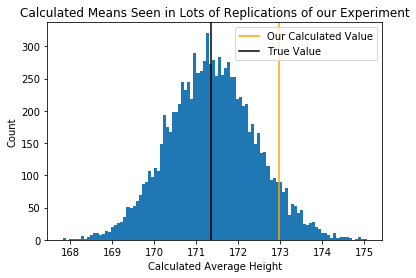

In [5]:
plt.hist(each_students_mean,100)
plt.axvline(each_students_mean[0],c='orange')
plt.axvline(true_pop_mean,c='black')
plt.xlabel("Calculated Average Height")
plt.ylabel("Count")
plt.legend(["Our Calculated Value","True Value"])
plt.title("Calculated Means Seen in Lots of Replications of our Experiment")
plt.show()

Hmmm, the mean we wrote down is kind of far from the rest of the results, and from the true value. And the overall distribution of means looks maybe-kinda normal, but it's hard to tell.

### Sampling distribution of the variance
What do the variance calculations look like?

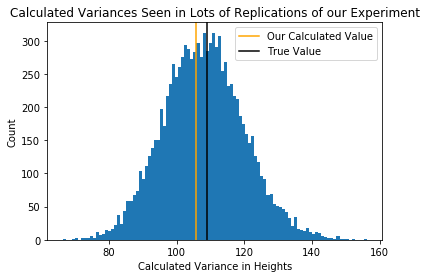

In [6]:
plt.hist(each_students_variance,100)
plt.axvline(each_students_variance[0],c='orange')
plt.axvline(true_pop_variance,c='black')
plt.xlabel("Calculated Variance in Heights")
plt.ylabel("Count")
plt.legend(["Our Calculated Value","True Value"])
plt.title("Calculated Variances Seen in Lots of Replications of our Experiment")
plt.show()

Oh, hey, we were pretty close to the true value this time. And again the distribution looks mostly sort of normal.

### Sampling distribution of the maximum
What about the maximum height?

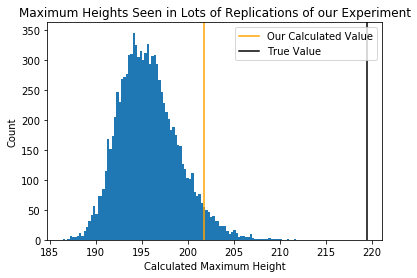

In [7]:
plt.hist(each_students_max,100)
plt.axvline(each_students_max[0],c='orange')
plt.axvline(true_pop_max,c='black')
plt.title("Maximum Heights Seen in Lots of Replications of our Experiment")
plt.xlabel("Calculated Maximum Height")
plt.ylabel("Count")
plt.legend(["Our Calculated Value","True Value"])
plt.show()

Yikes! Not only is the distribution non-symmetric and thus not normally distributed, we (and everyone else) are WAY off from the true maximum height. 

[Though this should make sense: the maximum height in one particular sample is almost certainly lower than the true maximum, and at best the sample maximum is equal to the true value. Maybe there's a better way of guessing the true maximum than just taking the max over the collected data, but that's for later...] 

## Recap:
What we see above are the sampling distributions of the mean, variance, and maximum as calculated from a sample of size 1000 from the full US population.

Each time we run the whole experiment (collecting data and calculating a summary) the particular value we get back is but one draw from the overal sampling distributions shown above.

Also, notice that in this example there is NO measurement error: when a grad student writes down someone's height they get it exactly right. The variability in the particular results we observe when collecting and crunching is entirely due to which sample of people we happened to get.

## What if we change the number of samples?
The above discussion looks at the distribution of means/variances/maxes observed in individual experiments with a sample size of 100. What happens if we vary the sample size to be bigger or smaller?

The code below just loops the original sample-and-calculate code at different sample sizes. 

Remember, these plots are the means/variances/maxes observed by an army of grad students all running the same experiment with different luck on what thier particular dataset looks like. The actual distribution of heights is the lumpy bi-modal thing at the top of the page.

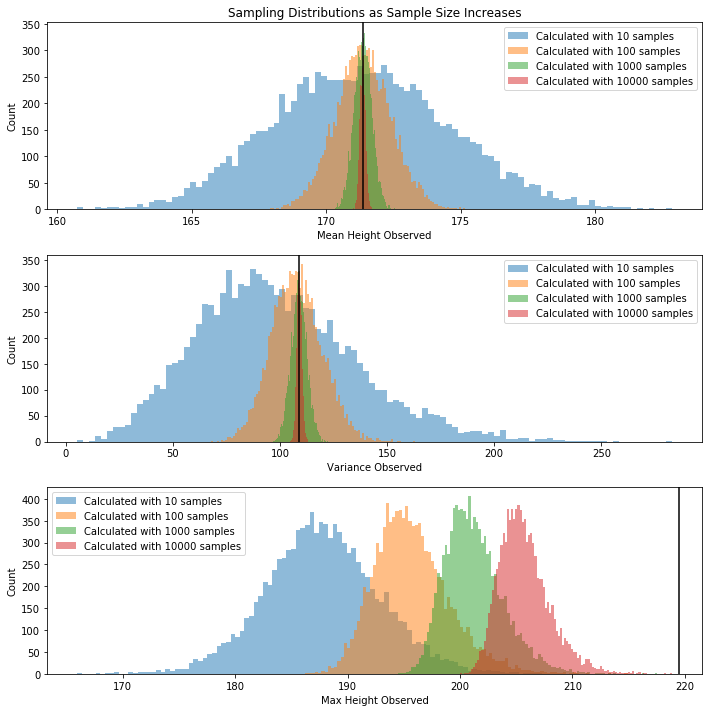

In [8]:
n_grad_students=10000
plotted_sample_sizes=[10,100,1000,10000]

#set up plots
f, ax = plt.subplots(3,1, figsize=(10,10))

#loop
for cur_n_samples in plotted_sample_sizes:
    
    #each of 10K grad student samples cur_n_samples many heights 
    #and calculates mean, variance, and max on thier dataset
    each_students_mean, each_students_variance, each_students_max = sample_and_calculate(n_grad_students,cur_n_samples)
    
    #plot histograms for this sample size    
    ax[0].hist(each_students_mean, 100, alpha=0.5);
    ax[1].hist(each_students_variance, 100, alpha=0.5);
    ax[2].hist(each_students_max, 100, alpha=0.5);

#label the plots
ax[0].set_title("Sampling Distributions as Sample Size Increases")
for i,word in zip(range(3),["Mean Height","Variance","Max Height"]):
    ax[i].set_xlabel(word+ " Observed")
    ax[i].set_ylabel("Count")
    ax[i].legend(["Calculated with "+str(x)+" samples" for x in plotted_sample_sizes])

#lines at the true values 
ax[0].axvline(true_pop_mean,c='black')
ax[1].axvline(true_pop_variance,c='black')
ax[2].axvline(true_pop_max,c='black')
plt.tight_layout()

plt.show()

So, the observed mean and the observed variance seem to coalesce as sample size increases, each closing in on the true value and looking more or less normally distributed for large sample sizes. But the observed maximum height isn't converging at all and remains asymmetric and non-normal.

Why are mean and variance better behaved? The key is that both mean and variance are defined as sums (and division by sample size): mean sums each observation and variance sums the squared distance from the observation and the mean. It turns out that there are powerful theorems governing the sum of random variables (remember, a given entry in the dataset will not be the 100% the same each time we collect the data, so it is a random number a.k.a a random variable).

The Law of Large Numbers tells us that the distribution for the average of a bunch of random variables gets narrower and narrower as the sample size goes to infinity, while the Central Limit Theorem adds that a sum (or an average) of random variables becomes normally distributed as the sample size grows to infinity.

**So, in summary:** Mean and Variance close in on the true value with a roughly normal distribution beacuse they're defined as a sum over the data. The maximum value is NOT a sum over the data and is not guaranteed to play nicely.

The nice behavior of sums of random quantites gives us confidence that, with enough of those random quantities, the mean/variance we observe won't be too different than the one anyone else running the same experiment observes, and further, that if we sum over random quantities that can reasonably be thought of as coming from the same distribution, we won't be too far from the true mean/variance of that distribution, either.